In [1]:
with open('train.txt','r') as f : 
    lines= f.readlines()
print(len(lines))

4750


In [6]:
print(lines[4].split(','))
print(len(lines[4].split(',')))

['2022-12-15 11:42:31', '474   INFO  BATCH[0010/0464] depth_loss:9.0818', ' heading_loss:3.1387', ' offset2d_loss:1.6431', ' offset3d_loss:0.9716', ' seg_loss:35.1597', ' size2d_loss:25.6500', ' size3d_loss:0.7444', '\n']
9


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
lenLines=len(lines)
results = []
result_weight_epochs=[]
for i in range(0,lenLines,95):
    tmp= lines[i:i+95]
    result_epoch=[]
    for j in range(2,len(tmp)):
        if j == 2 : 
            temp=tmp[j].split(':')[4:]
            temp=[float(i.split(',')[0]) for i in temp]
            result_weight_epochs.append(temp)
            continue
        
        temp=tmp[j].split(':')[3:]
        temp=[float(i.split(',')[0]) for i in temp]
        result_epoch.append(temp)
    
    results.append(result_epoch)
        
        

print(len(result_weight_epochs))
print(len(results))

result_weight_epochs = np.array(result_weight_epochs)
results = np.array(results)
print(type(result_weight_epochs))
    
        
    

50
50
<class 'numpy.ndarray'>


In [22]:
print(results.shape)
print(np.mean(results,axis=1).shape)
results_mean=np.mean(results,axis=1)

(50, 92, 7)
(50, 7)


In [48]:
print(result_weight_epochs[:,2])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


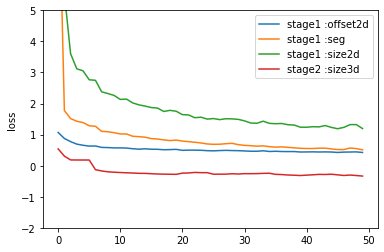

In [48]:
title=['stage1 :offset2d', 'stage1 :seg', 'stage1 :size2d','stage2 :size3d']
for i in [2,4,5,6]:
    plt.plot(results_mean[:,i])
    plt.legend(title)
    plt.ylabel('loss')
    plt.ylim(-2, 5)
    #plt.show()

In [ ]:
title=['depth_', 'heading_', 'offset2d_', 'offset3d_', 'seg_', 'size2d_', 'size3d_']
title=['offset2d_', 'offset3d_', 'size2d_', 'size3d_']
for i in range(results_mean.shape[1]):
    if i in [0,1,4]:
        continue
    plt.plot(results_mean[:,i])
    plt.legend(title)
    plt.xlabel('epoch')

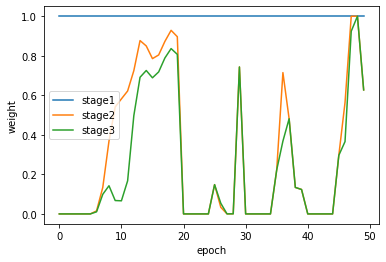

In [49]:
stage1 = (result_weight_epochs[:,2] + result_weight_epochs[:,4] + result_weight_epochs[:,5])/3
stage2 = (result_weight_epochs[:,3] + result_weight_epochs[:,6] + result_weight_epochs[:,1])/3
stage3 = result_weight_epochs[:,0]
stage =['stage1','stage2','stage3']
stage_value=[stage1,stage2,stage3]
for i in stage_value:
    plt.plot(i)
    plt.legend(stage)
    plt.xlabel('epoch')
    plt.ylabel('weight')

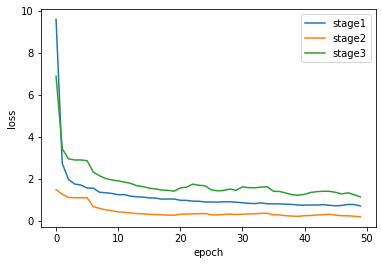

In [37]:
stage1 = (results_mean[:,2] + results_mean[:,4] + results_mean[:,5])/3
stage2 = (results_mean[:,3] + results_mean[:,6] + results_mean[:,1])/3
stage3 = results_mean[:,0]
stage =['stage1','stage2','stage3']
stage_value=[stage1,stage2,stage3]
for i in stage_value:
    plt.plot(i)
    plt.legend(stage)
    plt.xlabel('epoch')
    plt.ylabel('loss')